In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cebra
import cebra.datasets
from cebra import CEBRA


### 1. Load in Mthal data 
- CEBRA models 
- corrisponding embeddings (create from models and neural data)
- discerte_lables (what was used to train the model)
###### Neural Data
- neural_data (all nerual data (100%) full recording), 
- neural_train (neural data seperated into training group (80% of neural_data) that made corresponding cebra model)
- neural_test (neural data seperated into test group (20% of neural_data) that made corresponding cebra model)

In [2]:
mouse = 'reach1_4'

In [3]:
# variables to load different models and neural data
num_reaches = 278
probe = 'B' # probe used for the neural data
bin_size_in_ms = 50 # in milliseconds
output_dimension = 32 # number of dimensions for the embeddingspre
pre_reach = 1
post_reach = 10

load full neural_data

In [4]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'

# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
neural_data_path =f'neural_data/{mouse}_{bin_size_in_ms}ms_FR_{window_size}_{probe}.npy'

# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)

(538, 61160)
(61160, 538)


load neural data (train and test)

In [5]:
path_ = f'train_test_data/{mouse}_neural_train.npy'
neural_train = np.load(path_)

path_ = f'train_test_data/{mouse}_neural_test.npy'
neural_test = np.load(path_)

path_ = f'train_test_data/{mouse}_label_train.npy'
label_train = np.load(path_)

path_ = f'train_test_data/{mouse}_label_test.npy'
label_test = np.load(path_)

neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((48928, 538), (12232, 538), (48928, 2), (12232, 2))

load cebra models and make embeddings

In [6]:
MI = 5000 # maximum number of iterations
OD =32 # output dimension
P = 'B' # probe letter

In [7]:
# We get train set embedding and test set embedding.
cebra_posdir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_trialID_SucessFailure_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_posdir_train = cebra_posdir_model.transform(neural_train)
cebra_posdir_test = cebra_posdir_model.transform(neural_test)

cebra_pos_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_trialID_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_pos_train = cebra_pos_model.transform(neural_train)
cebra_pos_test = cebra_pos_model.transform(neural_test)

cebra_dir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_SucessFailure_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_dir_train = cebra_dir_model.transform(neural_train)
cebra_dir_test = cebra_dir_model.transform(neural_test)

cebra_pos_all = cebra_pos_model.transform(neural_data_transposed)
cebra_dir_all = cebra_dir_model.transform(neural_data_transposed)
cebra_posdir_all = cebra_posdir_model.transform(neural_data_transposed)


load discerte_lables 

In [8]:
load_path = f'discrete_lables/{mouse}_trial_ID_SF.npy'
discrete_labled_loaded = np.load(load_path)
discete_lables = discrete_labled_loaded
discete_lables.shape
np.unique(discete_lables[:,0]), np.unique(discete_lables[:,1])

(array([0., 1., 2.]), array([0., 1.]))

preview embeddings

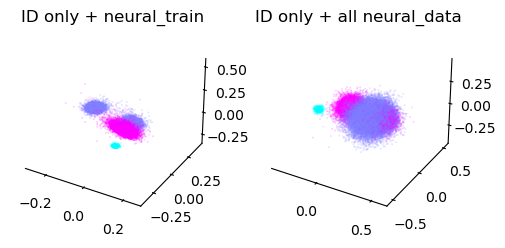

((48928, 32), (61160, 32))

In [9]:
fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')

ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_train, embedding_labels=label_train[:,0], title='ID only + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=discete_lables[:,0], title='ID only + all neural_data')

plt.show()
cebra_posdir_train.shape, cebra_pos_all.shape

load cebra-time models (not trained with lables)

Text(0.5, 0.98, 'CEBRA-Time Model, Mthal')

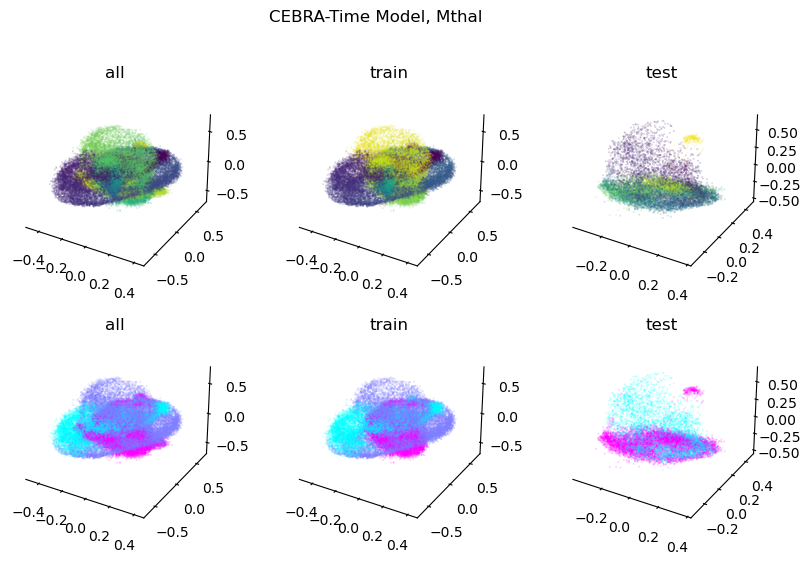

In [10]:
path_0 = "reach1_4_50msFr_0.001LR_1000MI_outDim32_B_2024-03-29_19-31-13_timeOnly.cebra"
path_0 = 'reach1_4_50msFr_0.001LR_1500MI_outDim32_B_2024-04-02_13-07-00_timeOnly.cebra'

cebra_time_model = cebra.CEBRA.load(f'time_only_models/{path_0}')
cebra_time_all = cebra_time_model.transform(neural_data_transposed)
cebra_time_train = cebra_time_model.transform(neural_train)
cebra_time_test = cebra_time_model.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_time_all, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_time_train, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_time_test, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_time_all, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_time_train, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_time_test, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA-Time Model, Mthal')

In [11]:
mthal_embedding_train = cebra_time_train
mthal_embedding_all = cebra_time_all

### 1.2 Load in M1 data 


In [12]:
probe = 'A' # probe used for the neural data
P = probe

load full neural data

In [13]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'

# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
neural_data_path =f'neural_data/{mouse}_{bin_size_in_ms}ms_FR_{window_size}_{probe}.npy'

# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)

(45, 61160)
(61160, 45)


load neural_data (test and train)

In [14]:
def split_data(data, test_ratio):

    split_idx = int(len(data)* (1-test_ratio))
    neural_train = neural_data_transposed[:split_idx]
    neural_test = neural_data_transposed[split_idx:]
    label_train = discete_lables[:split_idx]
    label_test = discete_lables[split_idx:]

    return neural_train, neural_test, label_train, label_test

neural_train, neural_test, label_train, label_test = split_data(neural_data_transposed, 0.2)
neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((48928, 45), (12232, 45), (48928, 2), (12232, 2))

load cebra models and make embeddings

In [15]:
MI = 5000 # maximum number of iterations
OD =32 # output dimension
P = 'A' # probe letter

In [16]:
np.unique(label_train[:,0]), np.unique(label_train[:,1])

(array([0., 1., 2.]), array([0., 1.]))

In [17]:
# We get train set embedding and test set embedding.
cebra_posdir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_trialID_SucessFailure_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_posdir_train = cebra_posdir_model.transform(neural_train)
cebra_posdir_test = cebra_posdir_model.transform(neural_test)

cebra_pos_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_trialID_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_pos_train = cebra_pos_model.transform(neural_train)
cebra_pos_test = cebra_pos_model.transform(neural_test)

cebra_dir_model = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_SucessFailure_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_dir_train = cebra_dir_model.transform(neural_train)
cebra_dir_test = cebra_dir_model.transform(neural_test)

cebra_pos_all = cebra_pos_model.transform(neural_data_transposed)
cebra_dir_all = cebra_dir_model.transform(neural_data_transposed)
cebra_posdir_all = cebra_posdir_model.transform(neural_data_transposed)

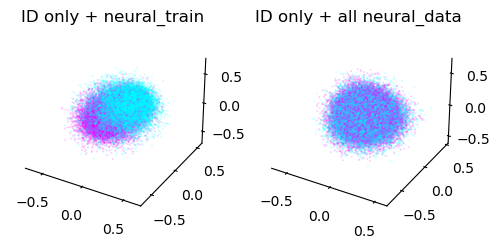

((48928, 32), (61160, 32))

In [18]:
fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')

ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_train, embedding_labels=label_train[:,1], title='ID only + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=discete_lables[:,1], title='ID only + all neural_data')

plt.show()
cebra_posdir_train.shape, cebra_pos_all.shape

In [19]:
m1_embedding_train= cebra_posdir_train
m1_embedding_all = cebra_pos_all

Text(0.5, 0.98, 'CEBRA-Time Model, M1')

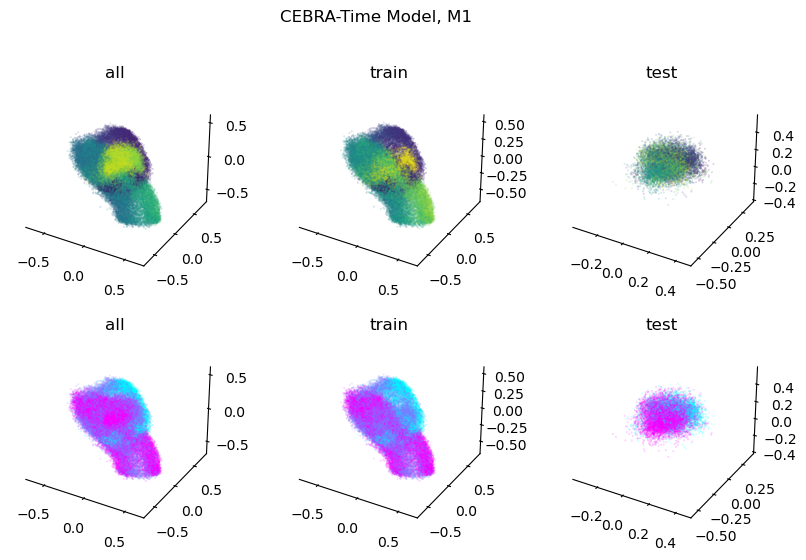

In [20]:
path_0 = 'reach1_4_50msFr_0.001LR_1500MI_outDim20_A_2024-04-01_18-58-59_timeOnly.cebra'

cebra_time_model = cebra.CEBRA.load(f'time_only_models/{path_0}')
cebra_time_all = cebra_time_model.transform(neural_data_transposed)
cebra_time_train = cebra_time_model.transform(neural_train)
cebra_time_test = cebra_time_model.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_time_all, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_time_train, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_time_test, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_time_all, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_time_train, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_time_test, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA-Time Model, M1')

In [21]:
m1_embedding_train = cebra_time_train
m1_embedding_all = cebra_time_all


### 2. Construct Inputs and Target for RNN

In [22]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

prepare input and target data

In [23]:
input = mthal_embedding_all
target = m1_embedding_all
input.shape, target.shape   

((61160, 32), (61160, 20))

In [24]:
# Slice to keep only the first 20 columns
input = input[:, :20]

In [25]:
# Assuming input and target are numpy arrays or PyTorch tensors of shape (48928, 32)
# First, calculate the number of complete reaches in the training set
num_reaches_train = 278   # Calculate 80% of reaches for training
print(num_reaches_train)
# Since each reach has 210 time bins, calculate the total number of bins used for training
total_bins_train = int(num_reaches_train * 220)  # Make sure to use int for exact number conversion

# Now reshape input and target tensors for the training set
input_tensor = torch.tensor(input[:total_bins_train]).reshape(-1, 220, 20)  # Reshape to (222, 210, 32)
target_tensor = torch.tensor(target[:total_bins_train]).reshape(-1, 220, 20)  # Reshape to (222, 210, 32)

# Convert the existing tensors to float32 if they are not already
input_tensor = input_tensor.float()
target_tensor = target_tensor.float()


# Create a TensorDataset
train_dataset = TensorDataset(input_tensor, target_tensor)


# Optionally create a validation dataset using the remaining data if needed
input_tensor.shape, target_tensor.shape

278


(torch.Size([278, 220, 20]), torch.Size([278, 220, 20]))

In [26]:
input_array = input_tensor.detach().numpy()
target_array = target_tensor.detach().numpy()

input_array.shape, target_array.shape,input_array[0,0,:3], target_array[0,0,:3]

((278, 220, 20),
 (278, 220, 20),
 array([-0.01563655,  0.4069805 ,  0.1664646 ], dtype=float32),
 array([-0.07355929,  0.2447356 , -0.16867019], dtype=float32))

(220,)


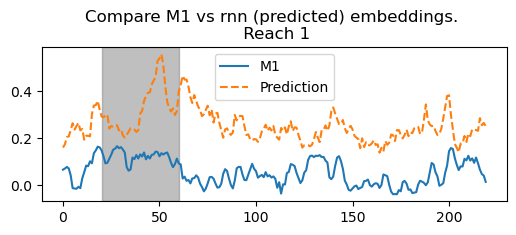

In [27]:
import matplotlib.pyplot as plt

# note every 20 time bins is 1 second
# each reach is 220 time bins, (1 second befoe reach to 11 seconds after reach) 
# Select a few sample sequences
sample_indices = [0]  # Example indices
i = 0
for idx in sample_indices:
    plt.figure(figsize=(6,2))
    plt.plot(input_array[idx][:,4], label='M1')
    print(input_array[idx][:,4].shape)
    plt.plot(target_array[idx][:,4], label='Prediction', linestyle='--')
    plt.title(f'Compare M1 vs rnn (predicted) embeddings. \n Reach {idx+1}')
    # add a highlighted region to graph from bin 20-60
    plt.axvspan(20, 60, color='gray', alpha=0.5)
    plt.legend()
    plt.show()


Seperate the data into training and testing sets

In [28]:
input_tensor.detach().numpy().shape, target_tensor.detach().numpy().shape

((278, 220, 20), (278, 220, 20))

In [36]:
from torch.utils.data import TensorDataset, DataLoader, random_split

# Create a TensorDataset
dataset = TensorDataset(input_tensor, target_tensor)
print(len(dataset))
# Split into train and validation
train_size = int(0.8 * len(dataset))
print(train_size)
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


### 3. Construct RNN model

PyTorch rnn

In [315]:
# Adjusting the model for the specific neural data task
class NeuralRNN(nn.Module):
    def __init__(self, input_size=20, hidden_size=64, num_layers=1, output_size=20):
        super(NeuralRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)  # Apply the linear layer to each time step
        return out

# Create an instance of the NeuralRNN
neural_rnn = NeuralRNN()



### 4. Train RNN 
- Input: Mthal embedding data
- Targert: M1 embedding data
- Output: Predicted M1 embedding data

In [330]:
all_outputs = []
for inputs, _ in train_loader:
    outputs = neural_rnn(inputs)
    all_outputs.append(outputs)
all_outputs = torch.cat(all_outputs, dim=0)  # Concatenate along the batch dimension
all_outputs.shape

torch.Size([222, 220, 20])

In [37]:
for inputs, targets in train_loader:
    print(inputs.shape)
    print(targets.shape)
    print(inputs[0][0].shape, inputs[0][0])
    print(targets[0][0].shape, targets[0][0])
    break

torch.Size([278, 220, 20])
torch.Size([278, 220, 20])
torch.Size([20]) tensor([-0.0736,  0.2447, -0.1687,  0.2158,  0.1585,  0.2879, -0.3441,  0.2285,
        -0.3379, -0.3165,  0.1540, -0.3644,  0.0456,  0.2543,  0.0838, -0.2458,
         0.0249,  0.0833,  0.1393, -0.2213])
torch.Size([20]) tensor([-1.5637e-02,  4.0698e-01,  1.6646e-01, -2.0449e-01,  6.4744e-02,
        -6.5235e-02, -3.2140e-01,  1.3180e-01,  1.3224e-01, -4.2215e-02,
        -4.1925e-02,  1.8145e-01,  3.3332e-01, -1.3819e-01,  2.7495e-04,
        -3.1004e-01, -1.5240e-01, -3.0570e-01, -1.9713e-01,  3.2925e-01])


In [352]:
import torch
loss_function = torch.nn.MSELoss()  # Mean Squared Error Loss, or choose another appropriate to your task
optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=0.0003)  # Using Adam optimizer

weight_history = []
num_epochs = 10000
# Assuming neural_rnn, train_loader, and val_loader are already defined
for epoch in range(num_epochs):
    # Training phase
   
    neural_rnn.train()  # Set the model to training mode
    train_loss = 0.0
    all_outputs = []
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear the gradients
        outputs = neural_rnn(inputs)  # Forward pass: compute the output
        loss = loss_function(outputs, targets)
        loss.backward()  # Backward pass: compute the gradient of the loss with respect to model parameters
        optimizer.step()  # Update parameters
        train_loss += loss.item() * inputs.size(0)  # Multiply by batch size to undo averaging in loss calculation
        all_outputs.append(outputs)

        # Save weights
        layer_weights = {name: parameter.data.clone() for name, parameter in neural_rnn.named_parameters()}
        weight_history.append(layer_weights)
    all_outputs = torch.cat(all_outputs, dim=0)  # Concatenate along the batch dimension
    train_loss /= len(train_loader.dataset)  # Average loss for the epoch

    # Validation phase
    neural_rnn.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    all_val_outputs = []
    with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
        for inputs, targets in val_loader:
            outputs_val = neural_rnn(inputs)
            loss = loss_function(outputs_val, targets)
            val_loss += loss.item() * inputs.size(0)
            all_val_outputs.append(outputs_val)

    all_val_outputs = torch.cat(all_val_outputs, dim=0)  
    val_loss /= len(val_loader.dataset)  # Average loss for the epoch

    # Print epoch statistics
    # print every 25 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {val_loss:.4f}')

Epoch 1 	Training Loss: 0.0215 	Validation Loss: 0.0254
Epoch 101 	Training Loss: 0.0197 	Validation Loss: 0.0212
Epoch 201 	Training Loss: 0.0193 	Validation Loss: 0.0208
Epoch 301 	Training Loss: 0.0187 	Validation Loss: 0.0203
Epoch 401 	Training Loss: 0.0183 	Validation Loss: 0.0202
Epoch 501 	Training Loss: 0.0188 	Validation Loss: 0.0203
Epoch 601 	Training Loss: 0.0178 	Validation Loss: 0.0199
Epoch 701 	Training Loss: 0.0175 	Validation Loss: 0.0192
Epoch 801 	Training Loss: 0.0262 	Validation Loss: 0.0272
Epoch 901 	Training Loss: 0.0208 	Validation Loss: 0.0229
Epoch 1001 	Training Loss: 0.0196 	Validation Loss: 0.0214
Epoch 1101 	Training Loss: 0.0193 	Validation Loss: 0.0200
Epoch 1201 	Training Loss: 0.0181 	Validation Loss: 0.0195
Epoch 1301 	Training Loss: 0.0178 	Validation Loss: 0.0198
Epoch 1401 	Training Loss: 0.0174 	Validation Loss: 0.0201
Epoch 1501 	Training Loss: 0.0180 	Validation Loss: 0.0192
Epoch 1601 	Training Loss: 0.0301 	Validation Loss: 0.0320
Epoch 170

In [353]:
all_outputs.shape, all_val_outputs.shape

(torch.Size([222, 220, 20]), torch.Size([56, 220, 20]))

In [354]:
# # Assuming you have tensors input_tensor and target_tensor prepared
# loss_function = torch.nn.MSELoss()  # Mean Squared Error Loss, or choose another appropriate to your task
# optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=0.0003)  # Using Adam optimizer

# num_epochs = 500

# # Example training loop
# losses = []
# weight_history = []

# for epoch in range(num_epochs):
#     optimizer.zero_grad()               # Clear existing gradients
#     output_tensor = neural_rnn(input_tensor)  # Get the model's predictions
#     loss = loss_function(output_tensor, target_tensor)  # Calculate the loss
#     losses.append(loss.item())          # Save the loss value
#     loss.backward()                     # Compute gradient of the loss wrt model parameters
#     optimizer.step()    
#     # Save weights
#     layer_weights = {name: parameter.data.clone() for name, parameter in neural_rnn.named_parameters()}
#     weight_history.append(layer_weights)
#                     # Perform a single optimization step
#     # print every 25 epochs
#     if epoch % 100 == 0:
#         print(f"Epoch {epoch}: Loss = {loss.item()}")


Save out rnn model

In [355]:
rnn_save_path = 'rnn_models/rnn_model.pth'
# Saving the model
torch.save(neural_rnn.state_dict(), rnn_save_path)

# Loading the model
neural_rnn_loaded = NeuralRNN()  # Ensure it has the same architecture
neural_rnn_loaded.load_state_dict(torch.load(rnn_save_path))
neural_rnn_loaded.eval()  # Set to evaluation mode if inference only

# If you want to continue training, switch back to train mode
neural_rnn_loaded.train()


NeuralRNN(
  (rnn): RNN(20, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=20, bias=True)
)

plot weight history/evolution

In [356]:
print(weight_history[0].keys())
print(weights['rnn.weight_ih_l0'][0, 0].item())
weight_history[0]['fc.weight'].shape

dict_keys(['rnn.weight_ih_l0', 'rnn.weight_hh_l0', 'rnn.bias_ih_l0', 'rnn.bias_hh_l0', 'fc.weight', 'fc.bias'])
0.03886593133211136


torch.Size([20, 64])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


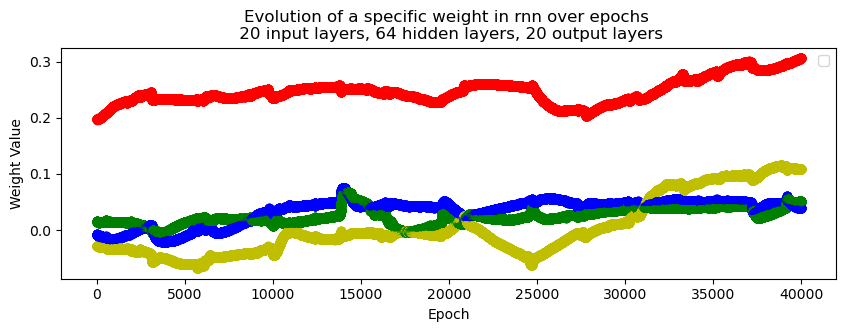

In [357]:
import matplotlib.pyplot as plt

# Example to plot the evolution of some specific weight
plt.figure(figsize=(10, 3))
for i, weights in enumerate(weight_history):
    plt.plot(i, weights['rnn.weight_ih_l0'][0, 0].item(),'yo')  # Just an example index
    plt.plot(i, weights['rnn.weight_hh_l0'][0, 0].item(), 'ro')  # Just an example index
    plt.plot(i, weights['fc.weight'][0, 0].item(), 'bo')  # Just an example index
    plt.plot(i, weights['fc.bias'][0].item(), 'go')  # Just an example index


plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.title('Evolution of a specific weight in rnn over epochs \n 20 input layers, 64 hidden layers, 20 output layers')

plt.show()


### 5. Visualize Embeddings
- Compare cebra M1 embeddings to RNN predicted embeddings

In [322]:
m1_embedding_train = cebra_time_train
m1_embedding_all = cebra_time_all

In [323]:
outputs_forwardPass_array = outputs_forwardPass.detach().numpy()
outputs_validationPass_array = outputs_val.detach().numpy()
target_tensor_array = target_tensor.detach().numpy()
print(outputs_forwardPass_array.shape, outputs_validationPass_array.shape)


(30, 220, 20) (56, 220, 20)


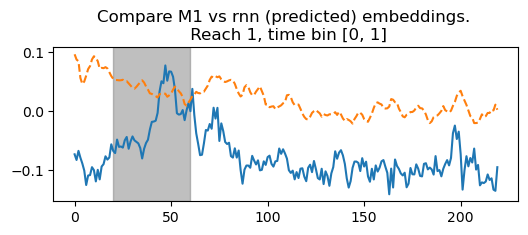

In [270]:
import matplotlib.pyplot as plt

# note every 20 time bins is 1 second
# each reach is 220 time bins, (1 second befoe reach to 11 seconds after reach) 
# Select a few sample sequences
sample_indices = [0]  # Example indices
time_bin = [0,1]
for idx in sample_indices:
    plt.figure(figsize=(6,2))
    plt.plot(target_tensor[idx][:,time_bin[0]:time_bin[1]][:,].detach().numpy(), label='M1')
    plt.plot(output_tensor[idx][:,time_bin[0]:time_bin[1]][:,].detach().numpy(), label='Prediction', linestyle='--')
    plt.title(f'Compare M1 vs rnn (predicted) embeddings. \n Reach {idx+1}, time bin {time_bin}')
    # add a highlighted region to graph from bin 20-60
    plt.axvspan(20, 60, color='gray', alpha=0.5)
    # plt.legend()
    plt.show()


In [89]:
target_embedding = target_tensor.detach().numpy()
rnn_output_embedding = output_tensor.detach().numpy()
target_embedding.shape,rnn_output_embedding.shape

((278, 220, 20), (278, 220, 20))

In [324]:
# output_FP_embedding = outputs_forwardPass_array
# output_FP_embedding.shape
# rnn_output_embedding = output_FP_embedding.reshape(-1, 20)
# rnn_output_embedding.shape

(6600, 20)

In [358]:
# Reshape the array to (30580, 32)
rnn_output_embedding = rnn_output_embedding.reshape(-1, 20)
target_embedding = target_embedding.reshape(-1, 20)
rnn_output_embedding.shape, target_embedding.shape

((48840, 20), (61160, 20))

In [359]:
rnn_output_embedding = all_outputs.detach().numpy()
rnn_val_embedding = all_val_outputs.detach().numpy()
rnn_output_embedding.shape, rnn_val_embedding.shape

((222, 220, 20), (56, 220, 20))

In [360]:
# Reshape the array to (30580, 32)
rnn_output_embedding = rnn_output_embedding.reshape(-1, 20)
rnn_val_embedding = rnn_val_embedding.reshape(-1, 20)
rnn_output_embedding.shape, rnn_val_embedding.shape

((48840, 20), (12320, 20))

In [361]:
m1_embedding_train = cebra_time_train
m1_embedding_all = cebra_time_all
m1_embedding_all.shape, m1_embedding_train.shape

((61160, 20), (48928, 20))

For rnn with seperated train and test sets

In [362]:
label_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Text(0.5, 0.98, 'M1 Vs. Rnn embeddings')

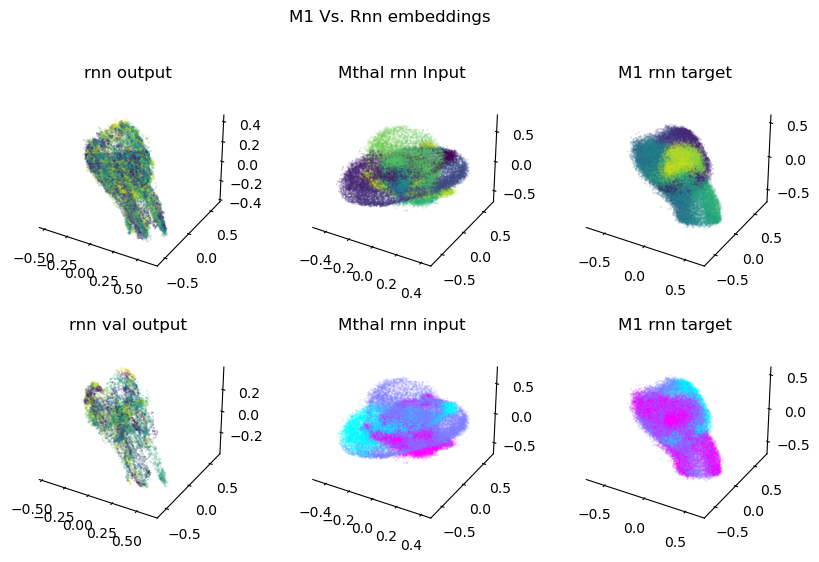

In [363]:
plt.figure(figsize=(10, 6))

index_order = (0,1,2)

#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=rnn_output_embedding, embedding_labels='time', title='rnn output')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=input, embedding_labels='time', title='Mthal rnn Input')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=target, embedding_labels='time', title='M1 rnn target')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=rnn_val_embedding, embedding_labels='time', title='rnn val output')
ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=input, embedding_labels=discete_lables[:,0], title='Mthal rnn input')
ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=target, embedding_labels=discete_lables[:,0], title='M1 rnn target')

# add title
plt.suptitle('M1 Vs. Rnn embeddings')

For rnn with non-seperated train and test sets

Text(0.5, 0.98, 'M1 Vs. Rnn embeddings')

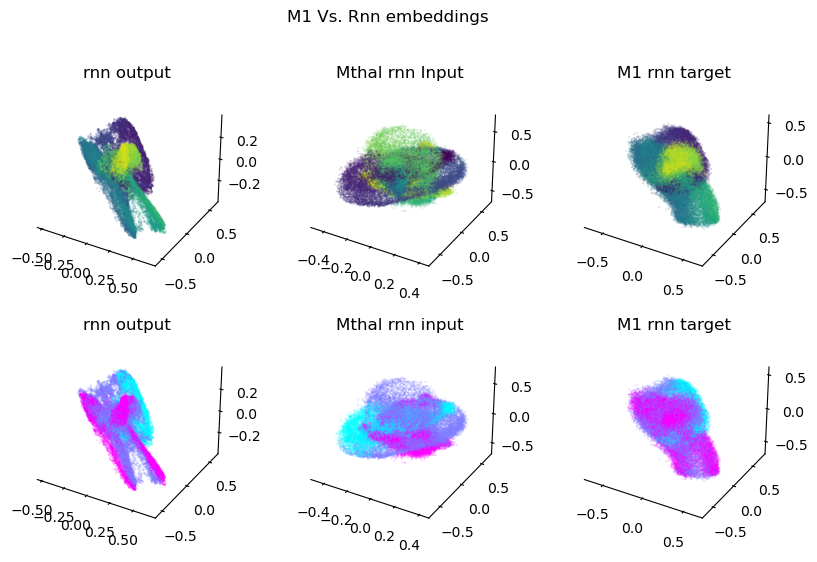

In [92]:
plt.figure(figsize=(10, 6))

index_order = (0,1,2)

#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=rnn_output_embedding, embedding_labels='time', title='rnn output')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=input, embedding_labels='time', title='Mthal rnn Input')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=target, embedding_labels='time', title='M1 rnn target')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=rnn_output_embedding, embedding_labels=discete_lables[:,0], title='rnn output')
ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=input, embedding_labels=discete_lables[:,0], title='Mthal rnn input')
ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=target, embedding_labels=discete_lables[:,0], title='M1 rnn target')

# add title
plt.suptitle('M1 Vs. Rnn embeddings')

Text(0.5, 0.98, 'M1 Vs. Rnn embeddings')

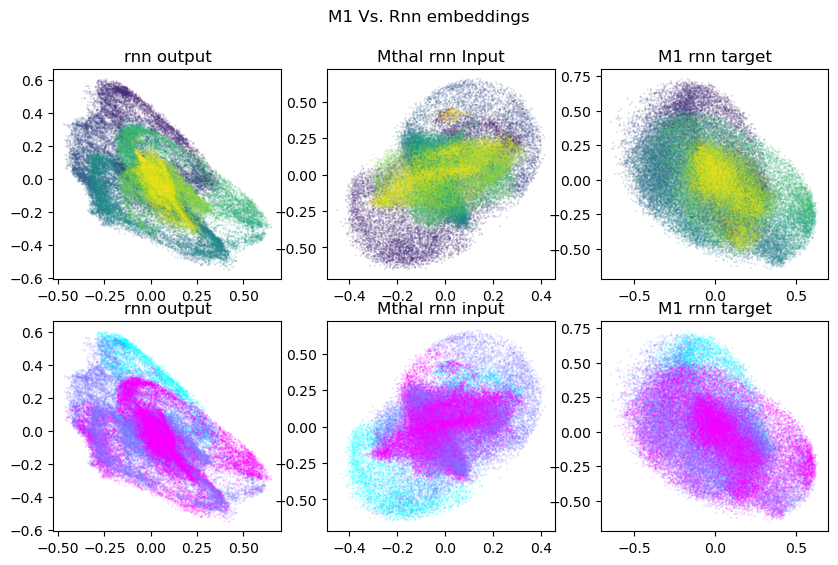

In [93]:
plt.figure(figsize=(10, 6))

index_order = (0,1)
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231)  # First row, first column
ax2 = plt.subplot(232)  # First row, second column
ax3 = plt.subplot(233)  # First row, second column
ax4 = plt.subplot(234)  # First row, second column
ax5 = plt.subplot(235)  # First row, second column
ax6 = plt.subplot(236)  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=rnn_output_embedding, embedding_labels='time', title='rnn output')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=input, embedding_labels='time', title='Mthal rnn Input')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=target, embedding_labels='time', title='M1 rnn target')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=rnn_output_embedding, embedding_labels=discete_lables[:,0], title='rnn output')
ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=input, embedding_labels=discete_lables[:,0], title='Mthal rnn input')
ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=target, embedding_labels=discete_lables[:,0], title='M1 rnn target')

# add title
plt.suptitle('M1 Vs. Rnn embeddings')

### 6. Decode lables from embeddings
- Decode lables (trial_ID, Success or Failure) from cebra embeddings
- Decode lables (trial_ID, Success or Failure) from RNN predicted embeddings

### 7. Pass real M1 embeddings cerebellar SNN
- See if SNN can predict when their is an error